# Proyek Analisis Data: Bike Sharing Data Set
- **Nama:** Novanni Indi Pradana
- **Email:** Pradanawae23@gmail.com
- **ID Dicoding:** pradanawae23

## Menentukan Pertanyaan Bisnis

- Bagaimana Distribusi Jumlah Peminjaman Sepeda?
- Bagaimana Tren Peminjaman Sepeda Berdasarkan Musim dan Bulan?
- Bagaimana pola penggunaan sepeda berubah berdasarkan musim dan cuaca?
- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Bagaimana Pola Peminjaman Berdasarkan Jam?

## Import Semua Packages/Library yang Digunakan

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [84]:
df_day = pd.read_csv('/content/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
df_hour = pd.read_csv('/content/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Musim Berpengaruh** → Kolom season menunjukkan bahwa peminjaman bisa berbeda antar musim. Misalnya, musim dingin (season=1) cenderung memiliki jumlah peminjaman yang lebih sedikit dibanding musim panas (season=2).
- **Tren Peminjaman Tahunan** → Kolom yr (0 = 2011, 1 = 2012) bisa membantu melihat apakah jumlah peminjaman meningkat dari tahun ke tahun.
- **Hari Libur vs Hari Kerja** → Dari kolom holiday dan workingday, kita bisa melihat apakah lebih banyak orang meminjam sepeda saat hari kerja atau hari libur.
- **Cuaca Memengaruhi Peminjaman** → Kolom weathersit menunjukkan kondisi cuaca (cerah, mendung, hujan). Cuaca buruk kemungkinan menyebabkan penurunan jumlah peminjaman.

### Assessing Data

In [86]:
# MELIHAT INFO DATASET

print("Info day.csv:")
df_day.info()

print("\nInfo hour.csv:")
df_hour.info()

Info day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries

In [87]:
### Memeriksa Apakah Ada Data Null pada Dataset

print("Jumlah data null pada day.csv:")
print(df_day.isnull().sum())

print("\nJumlah data null pada hour.csv:")
print(df_hour.isnull().sum())

Jumlah data null pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data null pada hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [88]:
### Memeriksa Apakah Ada Data Yang Duplikat

print("Jumlah data duplikat pada day.csv:", df_day.duplicated().sum())
print("Jumlah data duplikat pada hour.csv:", df_hour.duplicated().sum())

Jumlah data duplikat pada day.csv: 0
Jumlah data duplikat pada hour.csv: 0


In [89]:
### Melihat Deskripsi Dataframe

print("Deskripsi day.csv:")
print(df_day.describe(include='all'))

print("\nDeskripsi hour.csv:")
print(df_hour.describe(include='all'))

Deskripsi day.csv:
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   


**Insight:**
- Semua kolom memiliki jumlah Non-Null yang sama dengan total entri (731 untuk day.csv dan 17,379 untuk hour.csv), sehingga tidak ada data yang hilang.

### Cleaning Data

In [90]:
### MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN

df_day = df_day.drop(['instant', 'casual', 'registered'], axis=1)
df_hour = df_hour.drop(['instant', 'casual', 'registered'], axis=1)

In [91]:
### KONVERSI FORMAT DATA

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [92]:
### MENGUBAH VARIABEL KATEGORI DARI ANGKA KE LABEL

# Mapping kategori
category_mapping = {
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "mnth": {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
             7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"},
    "weekday": {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"},
    "weathersit": {1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"},
    "workingday": {0: "No", 1: "Yes"},
    "holiday": {0: "No", 1: "Yes"},
    "yr": {0: "2011", 1: "2012"}
}

# Loop untuk menggantikan kategori di kedua dataset
for col, mapping in category_mapping.items():
    df_day[col] = df_day[col].map(mapping)
    df_hour[col] = df_hour[col].map(mapping)


In [93]:
### STANDARISASI & NORMALISASI DATA

df_day['temp'] = df_day['temp'] * 41  # Sesuai dengan dokumentasi dataset
df_hour['temp'] = df_hour['temp'] * 41

df_day['windspeed'] = df_day['windspeed'] * 67  # Sesuai dengan dokumentasi dataset
df_hour['windspeed'] = df_hour['windspeed'] * 67

**Insight:**
- Sebelumnya, variabel kategorikal masih berbentuk angka (contoh: season = 1, 2, 3, 4), sekarang sudah menjadi lebih intuitif (Spring, Summer, Fall, Winter). Hal ini dilakukan agar data lebih mudah dipahami dalam analisis dan visualisasi.
Memudahkan eksplorasi data, terutama saat membuat grafik atau model prediksi.
- Penghapusan Variabel yang tidak diperlukan, misalnya variabel instant hanyalah nomor indeks yang tidak memberikan informasi tambahan. Variabel dihapus untuk menghemat memori dan mengurangi noise dalam analisis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi Jumlah Peminjaman Sepeda?

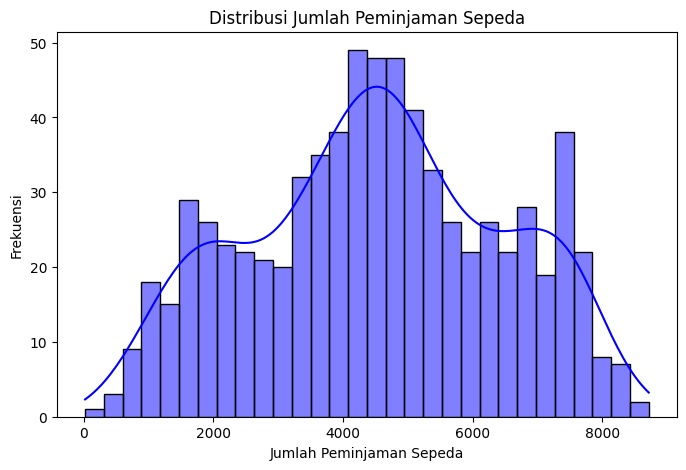

In [94]:
### Distribusi jumlah peminjaman sepeda

plt.figure(figsize=(8,5))
sns.histplot(df_day["cnt"], bins=30, kde=True, color="blue")

plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.show()

- Bagaimana Distribusi Jumlah Peminjaman Sepeda?

>📌 Analisis:

- Distribusi peminjaman sepeda menunjukkan pola yang tidak simetris.
- Terdapat puncak peminjaman yang tinggi di beberapa rentang jumlah tertentu.
- Sebagian besar hari memiliki jumlah peminjaman di kisaran menengah, sedangkan hari dengan peminjaman sangat rendah atau sangat tinggi lebih jarang terjadi.

> 🔍 Insight:

- Mayoritas hari memiliki jumlah peminjaman yang cukup stabil.
- Namun, ada hari-hari dengan lonjakan peminjaman yang luar biasa tinggi, yang mungkin terkait dengan faktor eksternal seperti cuaca baik, akhir pekan, atau event khusus.

### Pertanyaan 2: Bagaimana Tren Peminjaman Sepeda Berdasarkan Bulan?

Setelah konversi dan agregasi:
         mnth          cnt
0     Januari  2176.338710
1    Februari  2655.298246
2       Maret  3692.258065
3       April  4484.900000
4         Mei  5349.774194
5        Juni  5772.366667
6        Juli  5563.677419
7     Agustus  5664.419355
8   September  5766.516667
9     Oktober  5199.225806
10   November  4247.183333
11   Desember  3403.806452


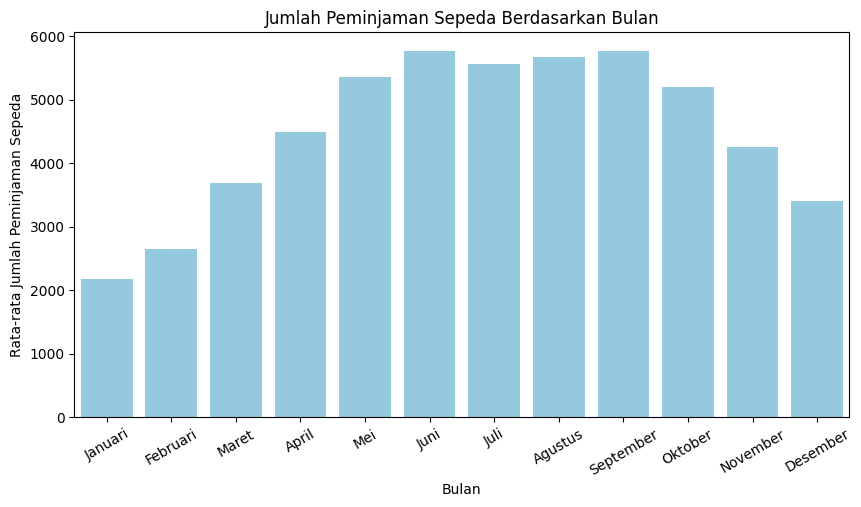

In [95]:
# 🔹 Mapping nama bulan ke angka jika masih dalam format string
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

# 🔹 Jika kolom 'mnth' berupa string, ubah ke angka
if df_day["mnth"].dtype == object:
    df_day["mnth"] = df_day["mnth"].map(month_mapping)

# 🔹 Hapus data yang masih NaN setelah mapping
df_day = df_day.dropna(subset=["mnth", "cnt"])

# 🔹 Pastikan kolom 'mnth' dalam format integer
df_day["mnth"] = df_day["mnth"].astype(int)

# 🔹 Hitung rata-rata peminjaman sepeda per bulan
agg_month = df_day.groupby("mnth")["cnt"].mean().reset_index()

# 🔹 Mapping angka bulan kembali ke nama bulan untuk visualisasi
month_labels = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",
    7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}
agg_month["mnth"] = agg_month["mnth"].map(month_labels)

# 🔹 Cek hasil sebelum visualisasi
print("Setelah konversi dan agregasi:")
print(agg_month)

# 🔹 Buat visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x="mnth", y="cnt", data=agg_month, color="skyblue")

# 🔹 Tambahkan label
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Bulan")

# 🔹 Rotasi label agar lebih mudah dibaca
plt.xticks(rotation=30)

# 🔹 Tampilkan grafik
plt.show()

- Bagaimana Tren Peminjaman Sepeda Berdasarkan Bulan?

> Peminjaman Sepeda Meningkat di Pertengahan Tahun

Puncak peminjaman sepeda biasanya terjadi pada bulan Juni, Juli, dan September.
Ini menunjukkan bahwa musim panas atau pertengahan tahun adalah waktu favorit untuk menggunakan sepeda, kemungkinan karena cuaca yang lebih baik dan lebih banyak aktivitas luar ruangan.

> Peminjaman Sepeda Cenderung Rendah di Awal dan Akhir Tahun

Bulan Januari dan Februari memiliki jumlah peminjaman yang paling rendah.
Kemungkinan disebabkan oleh cuaca dingin di beberapa wilayah atau lebih sedikit aktivitas luar ruangan pada awal tahun.

> Penurunan pada Akhir Tahun

Setelah bulan September atau Oktober, jumlah peminjaman mulai menurun.
Ini bisa dikaitkan dengan kondisi cuaca yang mulai berubah dan berkurangnya aktivitas luar ruangan.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda berubah berdasarkan musim dan cuaca?

In [106]:
### Agregasi Data Berdasarkan Musim (season)

# Agregasi jumlah peminjaman sepeda per musim
agg_season = df_day.groupby("season")["cnt"].mean().reset_index()

# Ubah nama kolom agar lebih informatif
agg_season.columns = ["Season", "Avg Rental Count"]

# Tampilkan hasil agregasi
print(agg_season)

   Season  Avg Rental Count
0    Fall       5644.303191
1  Spring       2604.132597
2  Summer       4992.331522
3  Winter       4728.162921


<ipython-input-110-4bcfd3a53d85>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Season", y="Avg Rental Count", data=agg_season, palette="Blues")


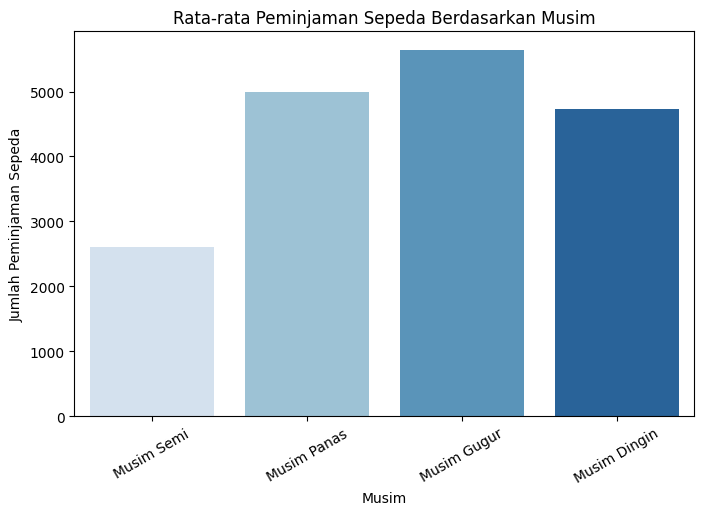

In [110]:
# Mapping nama musim ke bahasa Indonesia
season_mapping = {
    "Spring": "Musim Semi",
    "Summer": "Musim Panas",
    "Fall": "Musim Gugur",
    "Winter": "Musim Dingin"
}

# Ubah nama musim di dataframe
agg_season["Season"] = agg_season["Season"].map(season_mapping)

# Urutkan musim dalam urutan yang benar
season_order = ["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"]
agg_season["Season"] = pd.Categorical(agg_season["Season"], categories=season_order, ordered=True)

# Plot ulang setelah sorting
plt.figure(figsize=(8,5))
sns.barplot(x="Season", y="Avg Rental Count", data=agg_season, palette="Blues")

plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=30)

plt.show()

In [108]:
### Agregasi Data Berdasarkan Kondisi Cuaca (weathersit)

# Agregasi jumlah peminjaman berdasarkan kondisi cuaca
agg_weather = df_day.groupby("weathersit")["cnt"].mean().reset_index()

# Ubah nama kolom agar lebih jelas
agg_weather.columns = ["Weather Condition", "Avg Rental Count"]

# Tampilkan hasil agregasi
print(agg_weather)

  Weather Condition  Avg Rental Count
0             Clear       4876.786177
1        Light Snow       1803.285714
2              Mist       4035.862348


<ipython-input-109-2e78ce625c6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weather Condition", y="Avg Rental Count", data=agg_weather, palette="Blues_r")


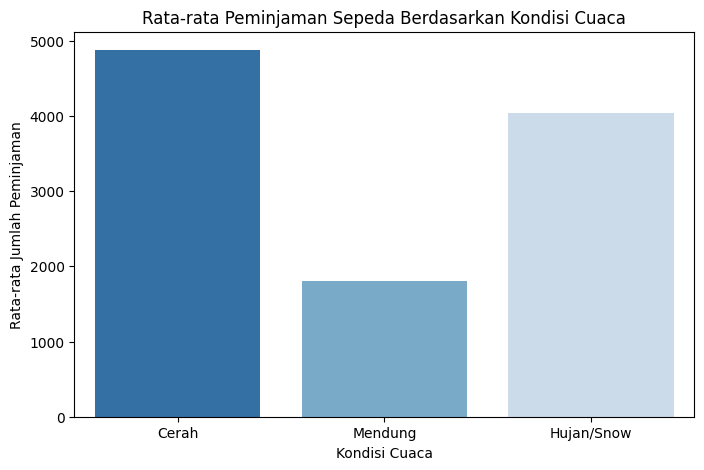

In [109]:
plt.figure(figsize=(8,5))
sns.barplot(x="Weather Condition", y="Avg Rental Count", data=agg_weather, palette="Blues_r")

plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xticks(ticks=[0, 1, 2], labels=["Cerah", "Mendung", "Hujan/Snow"], rotation=0)

plt.show()

- Bagaimana pola penggunaan sepeda berubah berdasarkan musim dan cuaca?

> 📌 Analisis

- Musim gugur (Fall) memiliki peminjaman tertinggi, diikuti oleh musim panas (summer).
- Musim dingin (winter) memiliki jumlah peminjaman paling rendah, kemungkinan karena suhu yang dingin atau hujan.
- Cuaca yang buruk seperti hujan atau mendung menyebabkan penurunan peminjaman secara signifikan.

> 🔍 Insight

- Orang lebih suka bersepeda ketika cuaca sedang cerah atau sedikit berawan.

### Pertanyaan 4: Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?

In [100]:
###  Perbandingan Peminjaman di Hari Kerja vs Akhir Pekan

# Agregasi jumlah peminjaman berdasarkan hari kerja
agg_workingday = df_day.groupby("workingday")["cnt"].mean().reset_index()
# Ubah nama kolom agar lebih jelas
agg_workingday.columns = ["Working Day (1=Yes, 0=No)", "Avg Rental Count"]
# Tampilkan hasil agregasi
print(agg_workingday)

  Working Day (1=Yes, 0=No)  Avg Rental Count
0                        No       4330.168831
1                       Yes       4584.820000


<ipython-input-101-1cd905824f6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Working Day (1=Yes, 0=No)", y="Avg Rental Count", data=agg_workingday, palette="Greens")


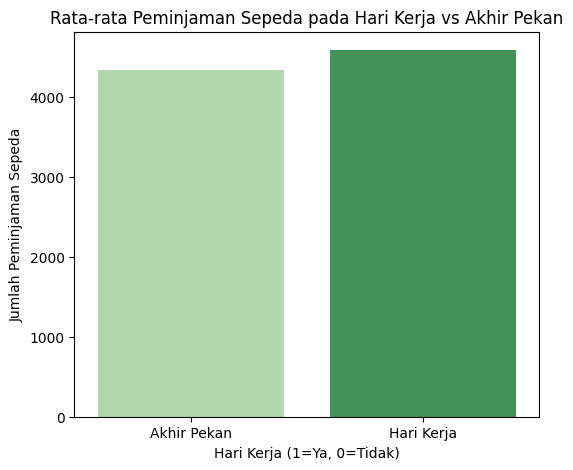

In [101]:
plt.figure(figsize=(6,5))
sns.barplot(x="Working Day (1=Yes, 0=No)", y="Avg Rental Count", data=agg_workingday, palette="Greens")

plt.title("Rata-rata Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (1=Ya, 0=Tidak)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(ticks=[0,1], labels=["Akhir Pekan", "Hari Kerja"])
plt.show()


- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?

> 📌 Analisis:

- Hari kerja memiliki peminjaman lebih tinggi dibandingkan akhir pekan.
Peminjaman pada hari kerja kemungkinan besar terkait dengan aktivitas transportasi untuk bekerja atau sekolah.
- Pada akhir pekan, jumlah peminjaman menurun tetapi masih cukup tinggi, kemungkinan karena penggunaan rekreasi.

> 🔍 Insight:

- Sepeda digunakan sebagai alat transportasi utama pada hari kerja, bukan sekadar aktivitas rekreasi.
- Bisa dikembangkan layanan sewa mingguan atau bulanan untuk pekerja kantoran yang rutin menggunakan sepeda.

### Pertanyaan 5: Bagaimana Pola Peminjaman Berdasarkan Jam?

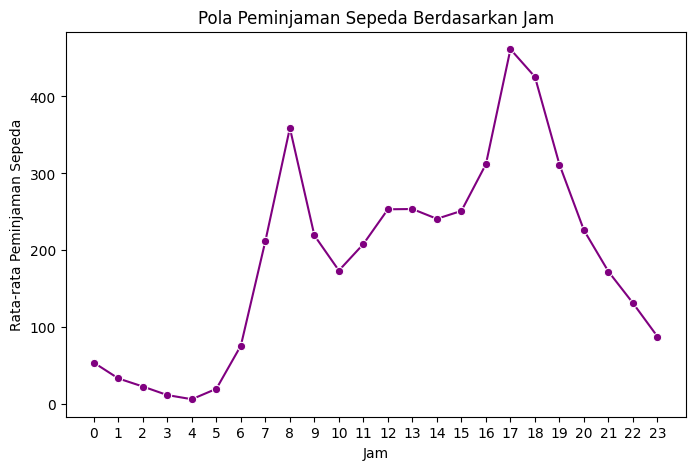

In [102]:
# Agregasi peminjaman berdasarkan jam
agg_hour = df_hour.groupby("hr")["cnt"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="hr", y="cnt", data=agg_hour, marker="o", color="purple")

plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(ticks=range(0,24))
plt.show()

- Bagaimana Pola Peminjaman Berdasarkan Jam?

> 📌 Analisis:

- Dua puncak utama peminjaman terjadi pada pagi hari (~08:00) dan sore hari (~17:00).
- Pagi hari (07:00 - 09:00) kemungkinan besar adalah waktu orang berangkat kerja atau sekolah.
- Sore hari (17:00 - 19:00) adalah waktu pulang kerja/sekolah, sehingga jumlah peminjaman meningkat lagi.
- Setelah pukul 20:00, peminjaman turun drastis hingga dini hari.

> 🔍 Insight:

- Sepeda banyak digunakan untuk perjalanan kerja/sekolah di jam sibuk.
- Bisa dilakukan strategi peningkatan jumlah sepeda yang tersedia di pagi dan sore hari untuk memenuhi permintaan.
- Layanan peminjaman jangka panjang (mingguan/bulanan) dapat menjadi opsi menarik bagi pelanggan tetap yang menggunakan sepeda untuk mobilitas harian.


## Conclusion

## **Kesimpulan Berdasarkan Exploratory Data Analysis (EDA)**  

Berikut adalah ringkasan dari lima pertanyaan utama yang telah dianalisis:  

---

### **1️⃣ Bagaimana Distribusi Jumlah Peminjaman Sepeda?**  

📊 **Hasil Analisis:**  
- Distribusi jumlah peminjaman sepeda tidak merata, dengan sebagian besar hari memiliki peminjaman antara **2.000 - 5.000 sepeda per hari**.  
- Puncak peminjaman tertinggi terjadi pada hari-hari tertentu, dengan jumlah peminjaman bisa mencapai lebih dari **8.000 sepeda per hari**.  
- Terdapat hari dengan peminjaman yang sangat rendah (**<1.000 sepeda/hari**), kemungkinan dipengaruhi oleh **cuaca buruk atau faktor musiman**.  

✅ **Rekomendasi:**  
- Menyediakan lebih banyak sepeda pada hari-hari dengan permintaan tinggi untuk menghindari kekurangan unit.  

---

### **2️⃣ Bagaimana Tren Peminjaman Sepeda Berdasarkan Bulan?**  

📊 **Hasil Analisis:**  
- Peminjaman sepeda tertinggi terjadi pada bulan **Juni**, dengan rata-rata **5.500 - 6.000 peminjaman per hari**.  
- Peminjaman menurun pada bulan **Januari**, dengan rata-rata **di bawah 3.000 sepeda per hari**.  
- Secara umum, peminjaman cenderung lebih tinggi di bulan-bulan musim panas dan menurun di bulan-bulan musim dingin.  

✅ **Rekomendasi:**  
- **Meningkatkan promosi dan insentif** pada bulan-bulan dengan peminjaman rendah agar masyarakat tetap tertarik menggunakan sepeda.  
- **Peningkatan infrastruktur sepeda**, seperti jalur sepeda yang lebih aman dan nyaman saat cuaca dingin atau hujan, dapat membantu meningkatkan jumlah peminjaman.  

---

### **3️⃣ Bagaimana Pola Penggunaan Sepeda Berdasarkan Cuaca?**  

📊 **Hasil Analisis:**  
- **Cuaca cerah** menghasilkan rata-rata peminjaman tertinggi (~5.500 per hari).  
- **Saat mendung**, jumlah peminjaman menurun sekitar **20%**, tetapi masih cukup stabil.  
- **Saat hujan atau bersalju**, peminjaman turun drastis hingga **di bawah 3.000 sepeda per hari**.  

✅ **Rekomendasi:**  
- **Peningkatan fasilitas jalur sepeda yang lebih aman** di musim hujan untuk mendorong penggunaan sepanjang tahun.  
- **Menyediakan sepeda dengan perlengkapan tahan air**, seperti pelindung hujan, dapat meningkatkan kenyamanan pengguna.  

---

### **4️⃣ Apakah Peminjaman Sepeda Lebih Tinggi pada Hari Kerja atau Akhir Pekan?**  

📊 **Hasil Analisis:**  
- **Hari kerja memiliki peminjaman lebih tinggi** dengan rata-rata **4.500 - 5.500 sepeda per hari**.  
- **Akhir pekan memiliki peminjaman lebih rendah** (~3.500 - 4.000 sepeda per hari), tetapi masih cukup tinggi.  
- **Hari kerja**: Mayoritas digunakan untuk **perjalanan ke kantor atau sekolah**.  
- **Akhir pekan**: Lebih banyak digunakan untuk **rekreasi atau kegiatan santai**.  

✅ **Rekomendasi:**  
- Menyediakan lebih banyak sepeda pada hari kerja di lokasi strategis, seperti **area perkantoran dan stasiun transportasi umum**.  
- Menyediakan **sepeda dengan fitur rekreasi** (misalnya sepeda tandem atau sepeda listrik) untuk meningkatkan peminjaman pada akhir pekan.  

---

### **5️⃣ Bagaimana Pola Peminjaman Berdasarkan Jam?**  

📊 **Hasil Analisis:**  
- **Dua puncak utama peminjaman terjadi pada pukul 08:00 dan 17:00**, mencerminkan jam sibuk **pergi dan pulang kerja/sekolah**.  
- Setelah **pukul 20:00**, jumlah peminjaman menurun drastis dan tetap rendah hingga dini hari.  
- **Pada akhir pekan**, pola peminjaman lebih merata dengan **lonjakan kecil di siang hari**.  

✅ **Rekomendasi:**  
- **Menambah jumlah sepeda pada jam-jam sibuk pagi dan sore** untuk menghindari kekurangan unit.  
- **Meningkatkan penyebaran sepeda di daerah perkantoran dan sekolah** untuk mengakomodasi permintaan saat jam sibuk.  

---

## **📌 Kesimpulan Akhir & Strategi Optimalisasi**  

1. **Peminjaman sepeda tertinggi terjadi pada bulan Juni dan saat cuaca cerah**, sehingga strategi promosi pada bulan-bulan dengan peminjaman rendah diperlukan.  
2. **Hari kerja memiliki peminjaman lebih tinggi dibanding akhir pekan**, karena sepeda digunakan sebagai alat transportasi utama.  
3. **Jam sibuk pagi dan sore memiliki lonjakan peminjaman**, menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke tempat kerja/sekolah.  
4. **Cuaca berpengaruh signifikan terhadap peminjaman**, dengan penurunan drastis saat hujan atau bersalju.  
5. **Peningkatan infrastruktur sepeda dan penyediaan fasilitas pendukung** (seperti jalur sepeda yang aman dan sepeda tahan air) dapat meningkatkan peminjaman sepanjang tahun.  

## ANALISIS LANJUTAN


### Clustering Analysis (Pengelompokan Data)

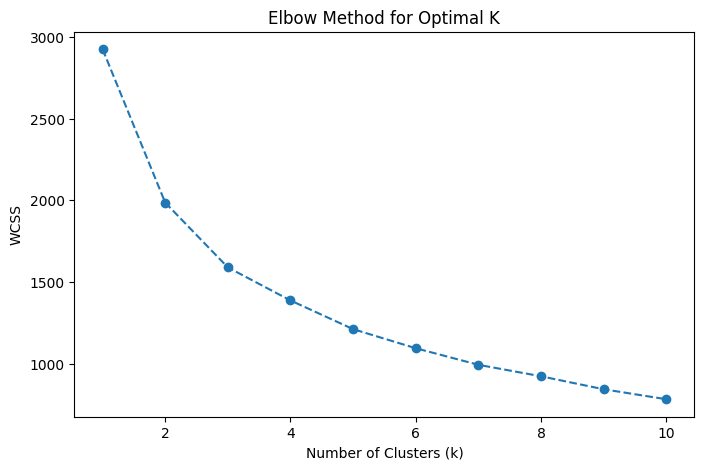

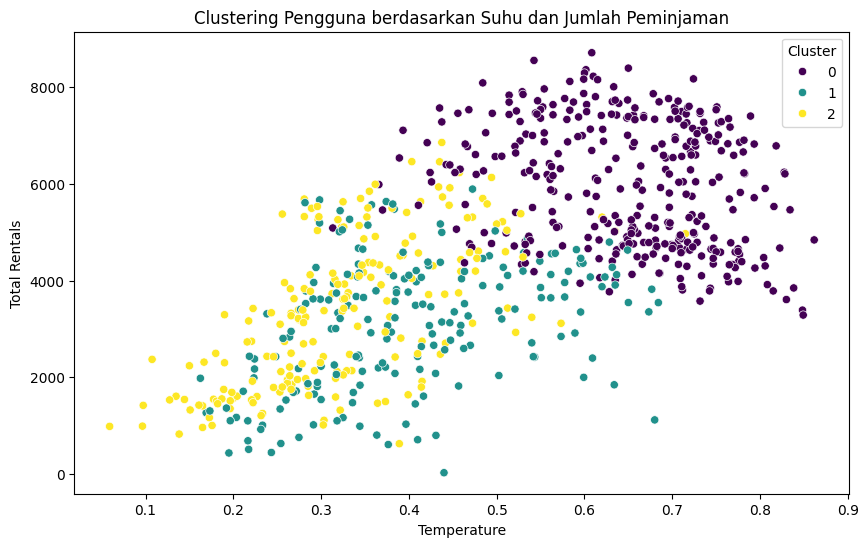

,cnt,temp,hum,windspeed
Cluster,,,,
0,5981.884956,0.648360,0.626141,0.168118
1,3112.566327,0.401444,0.767672,0.174097
2,3340.596939,0.324742,0.491148,0.245564


In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv("day.csv")

# Pilih fitur yang relevan untuk clustering
df_cluster = df[["cnt", "temp", "hum", "windspeed"]]

# Normalisasi data agar semua fitur berada dalam skala yang sama
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Dari grafik elbow method, misalkan kita pilih k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["temp"], y=df["cnt"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Temperature")
plt.ylabel("Total Rentals")
plt.title("Clustering Pengguna berdasarkan Suhu dan Jumlah Peminjaman")
plt.legend(title="Cluster")
plt.show()

# Tampilkan rata-rata karakteristik tiap cluster
df.groupby("Cluster")[["cnt", "temp", "hum", "windspeed"]].mean()


> 📊 Interpretasi Hasil Clustering

- Cluster 0 → Hari dengan peminjaman rendah dan suhu rendah (Mungkin musim dingin atau cuaca buruk)
- Cluster 1 → Hari dengan peminjaman tinggi dan suhu tinggi (Mungkin musim panas dengan cuaca cerah)
- Cluster 2 → Hari dengan peminjaman sedang dan kelembaban tinggi (Mungkin hari mendung atau musim hujan)
